## Final Project Submission

Please fill out:
* Student name: Samwel Kagwi Muiru
* Student pace: full time
* Scheduled project review date/time: 11th March 2023
* Instructor name: William 
* Blog post URL:


In [6]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 # this is to import  the SQL database 

# Data Cleaning bom.movie_gross file

In [5]:
bom_movie = pd.read_csv("bom.movie_gross.csv")
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [199]:
bom_movie.shape

(3387, 5)

We use bom_movie.info to get a concise summary of the dataframe.

In [200]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


We use .describe() to calculate the basic summary statistics for each column with numerical data.

In [201]:
bom_movie.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


To access the index or row labels of the DataFrame

In [203]:
bom_movie.index

RangeIndex(start=0, stop=3387, step=1)

To access the column labels of the DataFrame

In [204]:
bom_movie.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

We use .value_counts() to find out the count for how many times each unique value is present in the 'studio' column.

In [205]:
bom_movie['studio'].value_counts()

IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: studio, Length: 257, dtype: int64

In [206]:
len(bom_movie['studio'].unique())

258

To check for duplicate values.

In [207]:
bom_movie.duplicated().value_counts()

False    3387
dtype: int64

In [208]:
bom_movie.duplicated().sum()

0

We use .isnull() to check for missing values in the data.

In [209]:
bom_movie.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [210]:
bom_movie.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [211]:
bom_movie['domestic_gross'].median()

1400000.0

We drop the 'foreign gross' column due to alot of missing data.

In [249]:
bom_movie.drop("foreign_gross", axis=1, inplace=True)

In [250]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


We replace the missing values in the domestic gross column with the mean value

In [251]:
mean_bom = bom_movie['domestic_gross'].mean()
bom_movie['domestic_gross'].fillna(mean_bom, inplace = True)

We replace the missing values in the studio column with the mode value

In [252]:
mode_bom = bom_movie['studio'].mode()[0]
bom_movie['studio'].fillna(mode_bom, inplace = True)

In [253]:
domestic_gross_ = bom_movie.groupby('studio')["domestic_gross"].sum()
domestic_gross_.sort_values(ascending = False).head()

studio
BV      1.841903e+10
Uni.    1.290239e+10
WB      1.216805e+10
Fox     1.094950e+10
Sony    8.488429e+09
Name: domestic_gross, dtype: float64

# Data Cleaning rt.movie_info file

In [408]:
movie_info = pd.read_csv("rt.movie_info.tsv",delimiter='\t')
movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [214]:
movie_info.shape

(1560, 12)

In [215]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [308]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [315]:
mode_rating = movie_info['rating'].mode()[0]
movie_info['rating'].fillna('mode_rating', inplace = True)

In [316]:
mode_genre = movie_info['genre'].mode()[0]
movie_info['genre'].fillna('mode_rating', inplace = True)

In [ ]:
mode_rating = movie_info['rating'].mode()[0]
movie_info['rating'].fillna('mode_rating', inplace = True)

In [317]:
mode_runtime = movie_info['runtime'].mode()[0]
movie_info['runtime'].fillna(mode_runtime, inplace = True)

In [318]:
movie_info['runtime'] = movie_info['runtime'].str.extract(r'(\d+\.?\d*)', expand = False).astype(int)

In [320]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200,NaN


In [321]:
movie_info_df = movie_info[['rating', 'genre', 'runtime']]
movie_info_df

,rating,genre,runtime
0,R,Action and Adventure|Classics|Drama,104
1,R,Drama|Science Fiction and Fantasy,108
2,R,Drama|Musical and Performing Arts,116
3,R,Drama|Mystery and Suspense,128
4,NR,Drama|Romance,200
...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,106
1556,PG,Comedy|Science Fiction and Fantasy,88
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,111
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,101


# Data Cleaning rt.reviews file

In [409]:
movie_reviews = pd.read_csv("rt.reviews.tsv",delimiter='\t', encoding = 'latin-1')
movie_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [332]:
movie_reviews.shape

(54432, 8)

In [329]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [330]:
movie_reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

We do not clean this file, as we will not be using this data in our analysis and recommendation.

# Data Cleaning tmdb.movies file

In [410]:
movies = pd.read_csv("tmdb.movies.csv", index_col = 0)
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [234]:
movies.shape

(26517, 9)

In [235]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [236]:
movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [255]:
movies.duplicated().value_counts()

False    25497
dtype: int64

In [239]:
movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


Initially, our data had 26517 rows and 9 columns. The data had 1020 duplicated rows. We found discovered this by running the command #movies.duplicated().value_counts(). 

We then dropped the duplicated rows, while keeping the first row.

### To drop duplicate values

In [245]:
movies.drop_duplicates(keep = 'first', inplace = True)

In [246]:
movies.duplicated().value_counts()

False    25497
dtype: int64

In [256]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25497 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          25497 non-null  object 
 1   id                 25497 non-null  int64  
 2   original_language  25497 non-null  object 
 3   original_title     25497 non-null  object 
 4   popularity         25497 non-null  float64
 5   release_date       25497 non-null  object 
 6   title              25497 non-null  object 
 7   vote_average       25497 non-null  float64
 8   vote_count         25497 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.9+ MB


In [271]:
movies['original_language'].value_counts()

en    22384
fr      483
es      439
ru      295
ja      244
      ...  
bo        1
si        1
sl        1
hz        1
dz        1
Name: original_language, Length: 76, dtype: int64

In [262]:
movies['popularity'].sort_values(ascending = False).head(10)

23811    80.773
11019    78.123
23812    60.534
11020    53.783
5179     50.289
11021    49.606
20617    48.571
23814    48.508
23815    48.057
20618    46.775
Name: popularity, dtype: float64

In [265]:
movies_g = movies.groupby('original_language')['popularity'].value_counts()
movies_g

original_language  popularity
ab                 0.600         2
                   1.293         1
                   1.796         1
af                 4.814         1
ar                 0.600         9
                                ..
zh                 10.745        1
                   10.856        1
                   11.952        1
                   12.416        1
                   18.161        1
Name: popularity, Length: 9234, dtype: int64

In [273]:
popularity_language= movies.groupby('original_language')["popularity"].sum()
popularity_language.sort_values(ascending = False).head(10)

original_language
en    67117.397
fr     2023.207
ja     1327.126
es     1182.732
ru      696.868
de      669.375
zh      640.276
hi      602.347
ko      428.052
it      356.922
Name: popularity, dtype: float64

#We take the summation of the popularities based on the languages. Here, we find that languages in english have the most cumulative popularity

In [269]:
#movies.groupby(['original_language', 'original_title', 'popularity']).mean()

# Data Cleaning tn.movie_budgets file

In [411]:
movie_budgets = pd.read_csv("tn.movie_budgets.csv")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [248]:
movie_budgets.shape

(5782, 6)

In [222]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [223]:
movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [224]:
movie_budgets.duplicated().sum()

0

In [360]:
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budgets

AttributeError: Can only use .str accessor with string values!

In [361]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [282]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [283]:
movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09


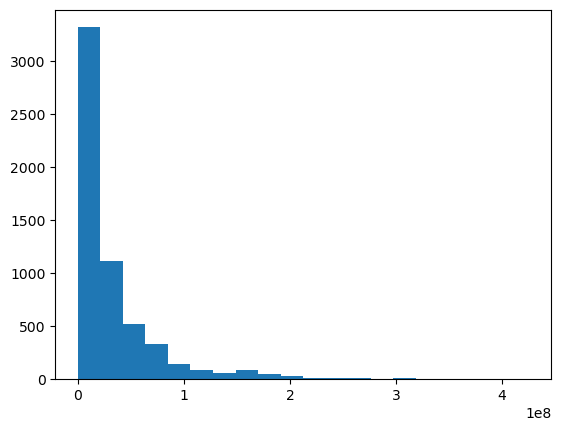

In [291]:
plt.hist(movie_budgets['production_budget'], bins = 20);

# 

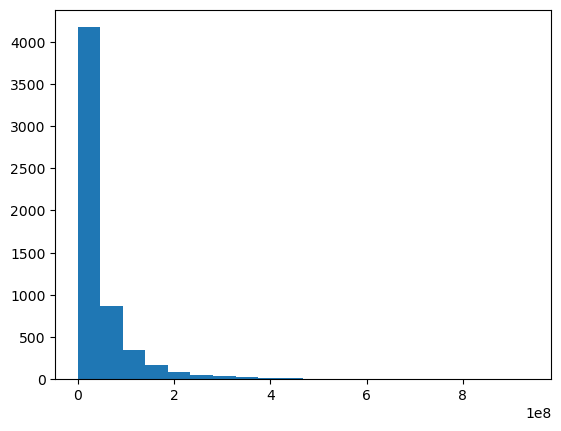

In [292]:
plt.hist(movie_budgets['domestic_gross'], bins = 20);

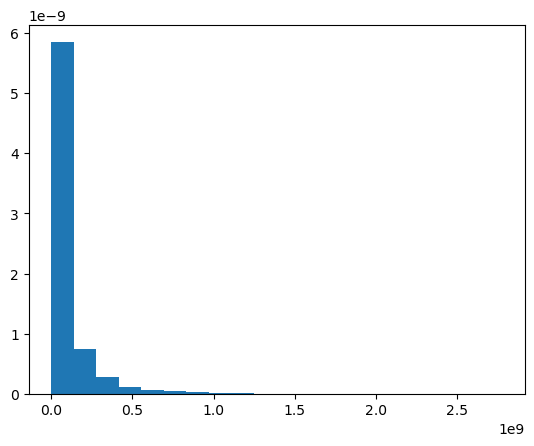

In [297]:
plt.hist(movie_budgets['worldwide_gross'], bins = 20, density = True, alpha = 1);

Correlation

In [304]:
correlation_pr_dm = round(movie_budgets['production_budget'].corr(movie_budgets['domestic_gross']),4)*100
print("The correlation between prod budg and dom gross rev is :", correlation_pr_dm, "%")

The correlation between prod budg and dom gross rev is : 68.57 %


Theres a correlation between production budget and domestic gross

In [305]:
correlation_pr_ww = round(movie_budgets['production_budget'].corr(movie_budgets['worldwide_gross']),4)*100
print("The correlation between production budget and dom gross rev is :", correlation_pr_ww, "%")

The correlation between production budget and dom gross rev is : 74.83 %


# Data Cleaning im.db file
Here, we import data from the movie_basics and movie_ratings files. We then join the two tables using a unique identifier (movie_id).

In [3]:
conn = sqlite3.connect("im.db")

In [4]:
imdb_basics = pd.read_sql("""
SELECT *
FROM movie_basics
"""
            ,conn)
imdb_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [355]:
imdb_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [356]:
imdb_basics.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [354]:
imdb_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
"""
            ,conn)
imdb_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [357]:
imdb_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [363]:
imdb_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [367]:
imdb = pd.read_sql("""
SELECT *
FROM movie_basics
JOIN movie_ratings
USING(movie_id);
""",conn)
imdb.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [364]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [365]:
imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [345]:
imdb.duplicated().sum()

0

In [369]:
imdb['genres'].mode()[0]

'Drama'

In [370]:
imdb['genres'].value_counts()

Drama                        11612
Documentary                  10313
Comedy                        5613
Horror                        2692
Comedy,Drama                  2617
                             ...  
Sport,Thriller                   1
Comedy,Sport,Western             1
Action,Music                     1
Comedy,Sci-Fi,Western            1
Documentary,Family,Sci-Fi        1
Name: genres, Length: 923, dtype: int64

We replace the missing values in the genres column with the most-occuring genre (drama).

In [374]:
#We define a variable then run

imdb_mode = imdb['genres'].mode()[0]
imdb['genres'].fillna('imdb_mode', inplace = True)

In [373]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [376]:
imdb_mean = imdb['runtime_minutes'].mean()
imdb['runtime_minutes'].fillna('imdb_mean', inplace = True)

In [394]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  73856 non-null  object 
 5   genres           73856 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 4.5+ MB


In [378]:
imdb.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [403]:
# convert Series
#my_series = pd.to_numeric(my_series)

# convert column "a" of a DataFrame
imdb["runtime_minutes"] = pd.to_numeric(imdb["runtime_minutes"])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2315, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "imdb_mean"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Grey 1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Grey 1\AppData\Local\Temp\ipykernel_5676\3188490649.py", line 5, in <module>
    imdb["runtime_minutes"] = pd.to_numeric(imdb["runtime_minutes"])
  File "C:\Users\Grey 1\anaconda3\lib\site-packages\pandas\core\tools\numeric.py", line 184, in to_numeric
    values, _ = lib.maybe_convert_numeric(
  File "pandas\_libs\lib.pyx", line 2357, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "imdb_mean" at position 3

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

In [405]:
data = pd.DataFrame({'A':[runtime_minutes].sum(),
                    'B':['averagerating'].sum()})

NameError: name 'runtime_minutes' is not defined

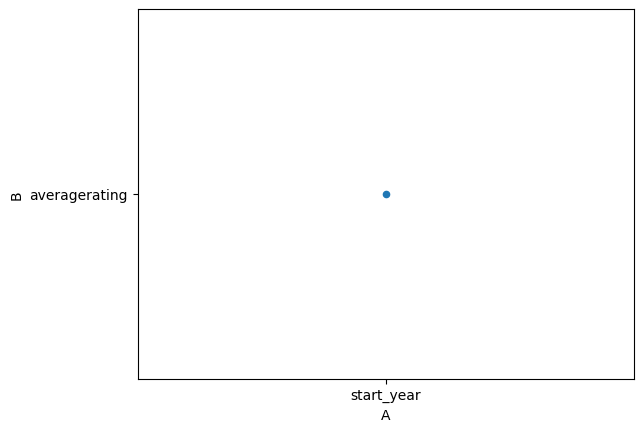

In [397]:
data.plot('A', 'B', kind='scatter');

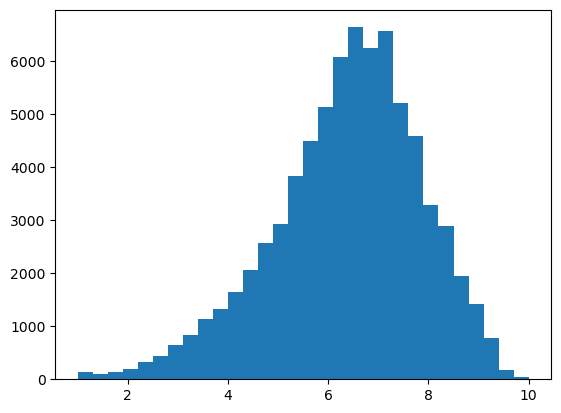

In [383]:
plt.hist(imdb['averagerating'], bins = 30);